In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [206]:
HAWK = 'HAWK'
DOVE = 'DOVE'
POINTS = {
    'DEATH': -100,
    'LOSE': -10,
    'WIN': 50
}
POPULATION_SIZE = 100
MAX_ROUNDS = 5
LIMIT_RESOURCE = 100

In [182]:
class Individual:
    def __init__(self, behavior):
        self.rounds = 0
        self.behavior = behavior

In [193]:
def content(population):
    figths = np.random.permutation(population.shape[0])
    if figths.shape[0] % 2 != 0: figths = figths[:figths.shape[0]-1]
    figths = np.reshape(figths, (-1, 2))
    ranking = np.zeros(population.shape)
    for figth in figths:
        op1, op2 = population[figth[0]].behavior, population[figth[1]].behavior
        if op1 == op2 == DOVE: ranking[figth[0]], ranking[figth[1]] = POINTS['WIN']-10, POINTS['LOSE']
        elif op1 == op2 == HAWK: ranking[figth[0]], ranking[figth[1]] = POINTS['WIN'], POINTS['DEATH']
        elif op1 == DOVE and op2 == HAWK: ranking[figth[0]], ranking[figth[1]] = 0, POINTS['WIN']
        elif op1 == HAWK and op2 == DOVE: ranking[figth[0]], ranking[figth[1]] = POINTS['WIN'], 0
    return ranking

In [194]:
def desc_population(population):
    doves, hawks = 0, 0
    for individual in population:
        if individual.behavior == DOVE: doves+=1
        elif individual.behavior == HAWK: hawks+=1
    return [ doves, hawks ]

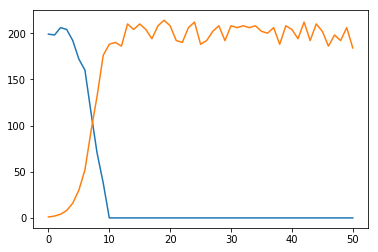

In [207]:
# Create init population
population = [ Individual(DOVE) for i in range(200 - 1) ]
population.insert(np.random.randint(POPULATION_SIZE), Individual(HAWK))
population = np.asarray(population)

idx_population = [ desc_population(population) ]

for i in range(50):
    # Content
    ranking = content(population)
    idx_rank = np.flip(np.argsort(ranking))
    new_population = []
    
    limit = int(LIMIT_RESOURCE + 15 * (np.random.rand() - 0.5))
    long = limit if idx_rank.shape[0] > limit else idx_rank.shape[0]
    
    for idx in range(long):
        pos = idx_rank[idx]
        new_population += [ population[pos], Individual(population[pos].behavior) ]
            
    population = np.asarray(new_population)
    idx_population.append(desc_population(population))

y = np.asarray(idx_population)
x = np.arange(y.shape[0])
plt.plot(x, y[:,0], x, y[:,1])
plt.show()